# Part 1: A/B Hypothesis testing

## Null Hypothesis: pA - pB = 0 or pA = pB

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statsmodels.formula.api as sm


NA = 1000
NB = NA
nA = 500
nB = 550

pA = nA/NA
pB = nB/NB

pHat = (NA/(NA+NB))*pA + (NB/(NA+NB))*pB
qHat = 1 - pHat

z = (pA - pB)/np.sqrt(pHat*qHat*(1/NA + 1/NB))
print("The Z-score is: " + str(z))

p_value = norm.cdf(z)
print("The p-value is: " + str(p_value))

The Z-score is: -2.238868314198227
The p-value is: 0.012582242850159199


### For a significance level of 0.05: 0.01258 < 0.05 and we reject the null hypothesis.
### For a significance level of 0.01: 0.01258 > 0.01 and we fail to reject the null hypothesis.

#### Since for an alpha of 0.05 we easily reject the null hypothesis and for an alpha of 0.01 we just barely fail to reject the null hypothesis, I would say that its safe to say that, overall, we would reject the null hypothesis and say that there is evidence to suggest that the probability of ad A is not equal to the probability of ad B. This hints that add B is better than add A.

# Part 2: Regression of real estate data

In [2]:
#Task 1
#Source pandas.pydata.org 

One = pandas.read_csv("realEstate1.csv", index_col= 0, header=0)
# display(One)

Two = pandas.read_csv("realEstate2.csv", index_col= 0, header=0)
# display(Two)

dataSet = One.append(Two)
# display(dataSet)



#Task 2

columnsToKeep = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

for index in dataSet.index:
    cellToEval = dataSet.at[index, 'LstPrice']
    if cellToEval < 200000 or cellToEval > 1000000:
        dataSet = dataSet.drop(index)

for column in dataSet.columns:
    if column not in columnsToKeep:
        dataSet = dataSet.drop(column, axis=1) 

for index in dataSet.index:
    cellToEval = dataSet.at[index, 'Longitude']
    if cellToEval == 0:
        dataSet = dataSet.drop(index)

dataSet['Taxes'].sort_values()
# Limits choesn via property tax rate multiplied by the LstPrice  https://smartasset.com/taxes/utah-property-tax-calculator#xNJUX0vfsy
# dropped the houses that had tax rates less than 100 dollars
for index in dataSet.index:
    taxes = dataSet.at[index, 'Taxes']
    listPrice = dataSet.at[index, 'LstPrice']
    if taxes > (listPrice * 0.0068) or taxes < 100:
        dataSet = dataSet.drop(index)

for index in dataSet.index:
    dataSet.at[index, 'TotSqf'] = dataSet.at[index, 'TotSqf'].replace(",", "")

dataSet.insert(loc=9, column= 'PropTypeNum', value= int)

for index in dataSet.index:
    if dataSet.at[index, 'PropType'] == 'Single Family':
        dataSet.at[index, 'PropTypeNum'] = 1
    else:
        dataSet.at[index, 'PropTypeNum'] = 0
    

dataSet = dataSet.astype({'TotSqf' : 'int64', 'PropTypeNum' : 'int32'})
dataSet.describe(include= 'all')


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,PropTypeNum,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.122069,0.834483,1.131034,40.777466,-111.876597,453663.193103,1.013793,1.110345,NaN,0.820690,440895.793103,2448.068966,3.289655,2.351724,2361.179310,1932.434483
std,0.104422,1.518469,0.922370,0.005595,0.014344,177568.720267,4.481422,1.607782,NaN,0.384942,167240.082054,1192.817286,1.129880,0.946712,1055.663711,36.034862
min,0.000000,0.000000,0.000000,40.770219,-111.913645,200000.000000,0.000000,0.000000,NaN,0.000000,200000.000000,612.000000,1.000000,1.000000,862.000000,1852.000000
25%,0.070000,0.000000,0.000000,40.772588,-111.890652,324900.000000,0.000000,0.000000,NaN,1.000000,320000.000000,1627.000000,2.000000,2.000000,1600.000000,1906.000000
50%,0.110000,1.000000,1.000000,40.775988,-111.873912,399900.000000,1.000000,0.000000,NaN,1.000000,394500.000000,2207.000000,3.000000,2.000000,2075.000000,1920.000000
75%,0.140000,1.000000,2.000000,40.781875,-111.866707,550000.000000,1.000000,2.000000,NaN,1.000000,525900.000000,2904.000000,4.000000,3.000000,2836.000000,1963.000000


# Task 3
### This data set has a list of 145 different houses in the Avenues of Salt Lake City, Utah (84103) containing 16 different variables. All data appears to fall within a reasonable range as seen above.

Text(0, 0.5, 'Number of Houses')

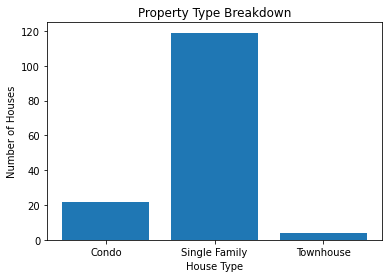

In [3]:
#plotting bar chart
# Source: python-graph-gallery.com/4-add-title-and-axis-label
# array key: 0 = Condo, 1 = Single Family, 2 = Townhouse
houseTypeCount = [0] * 3
for item in dataSet['PropType']:
    if item == 'Single Family':
        houseTypeCount[1] += 1
    elif item == 'Condo':
        houseTypeCount[0] += 1
    elif item == 'Townhouse':
        houseTypeCount[2] += 1
plt.bar(x = [0,1,2], height= houseTypeCount, tick_label= ['Condo', 'Single Family', 'Townhouse'])
# Source: python-graph-gallery.com/4-add-title-and-axis-label
plt.title('Property Type Breakdown')
plt.xlabel('House Type')
plt.ylabel('Number of Houses')


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropTypeNum,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt
Acres,1.000000,0.146703,0.292778,0.500052,0.176339,0.649491,-0.038200,0.179389,0.501666,0.629753,0.635022,0.492831,0.415473,0.722386,0.034012
Deck,0.146703,1.000000,0.050300,0.187367,0.032962,0.155652,0.828989,-0.012378,0.067678,0.152881,0.154641,0.088852,0.089085,0.151883,0.165931
GaragCap,0.292778,0.050300,1.000000,0.196058,0.044172,0.567829,-0.084442,-0.056646,-0.070276,0.545453,0.527923,0.196549,0.503543,0.437291,0.450200
Latitude,0.500052,0.187367,0.196058,1.000000,-0.315953,0.273274,-0.066753,0.178433,0.235168,0.273077,0.304251,0.137990,0.207268,0.290718,0.344704
Longitude,0.176339,0.032962,0.044172,-0.315953,1.000000,0.348332,0.052266,0.046859,0.237499,0.352355,0.354959,0.275763,0.102956,0.253601,-0.176027
LstPrice,0.649491,0.155652,0.567829,0.273274,0.348332,1.000000,-0.070227,0.197934,0.294043,0.992790,0.897049,0.585828,0.668584,0.850426,0.192793
Patio,-0.038200,0.828989,-0.084442,-0.066753,0.052266,-0.070227,1.000000,-0.053223,0.057802,-0.065714,-0.084356,-0.017252,-0.105909,-0.062292,-0.001671
PkgSpacs,0.179389,-0.012378,-0.056646,0.178433,0.046859,0.197934,-0.053223,1.000000,0.222941,0.179831,0.128044,0.177245,0.083822,0.130201,-0.159293
PropTypeNum,0.501666,0.067678,-0.070276,0.235168,0.237499,0.294043,0.057802,0.222941,1.000000,0.301108,0.198394,0.455541,0.155205,0.390564,-0.490472
SoldPrice,0.629753,0.152881,0.545453,0.273077,0.352355,0.992790,-0.065714,0.179831,0.301108,1.000000,0.878465,0.575528,0.649923,0.836826,0.191348


Text(0.5, 1.0, 'Heat Map of Correlation Matrix')

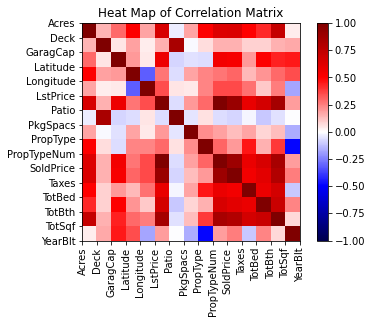

In [4]:
#Plotting a heat map
display(dataSet.corr())
heatMapForDataSet = plt.imshow(dataSet.corr(), cmap='seismic', vmin= -1, vmax= 1)
plt.colorbar(heatMapForDataSet)
labelLoc = [x - 0.5 for x in range(len(list(dataSet.columns)))]
plt.xticks(ticks=labelLoc, labels=dataSet.columns, rotation= 'vertical')
plt.yticks(ticks=labelLoc, labels=dataSet.columns)
plt.title('Heat Map of Correlation Matrix')


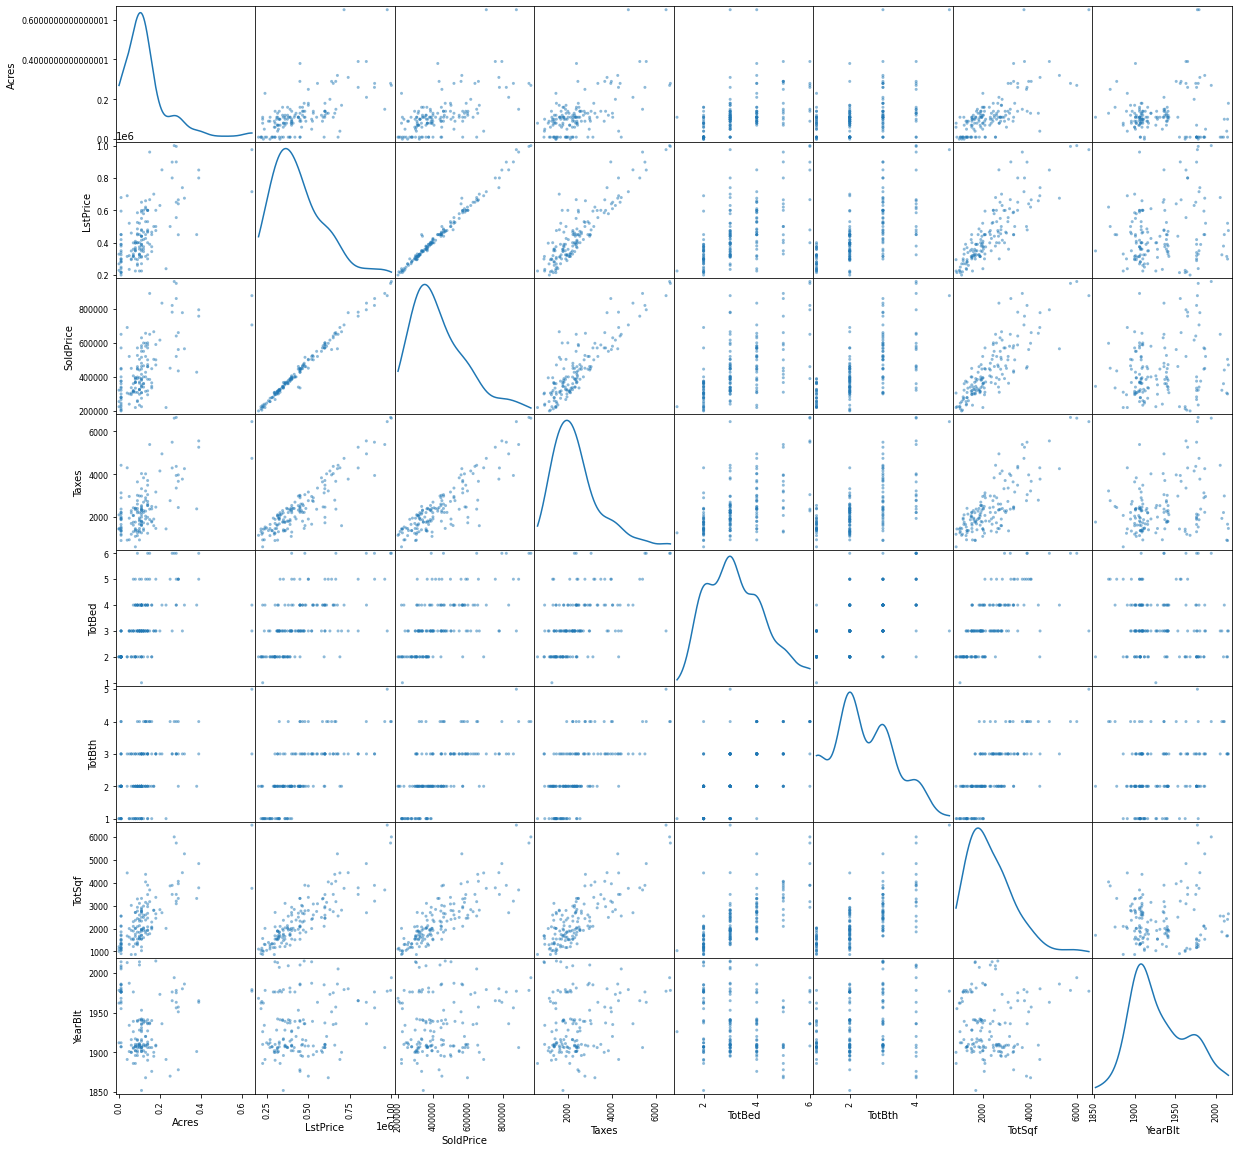

In [5]:
#Plotting Scatter matrix

scatterPlotData = dataSet.drop(['Deck','GaragCap', 'Latitude', 'Longitude', 'Patio', 'PkgSpacs', 'PropType','PropTypeNum'], axis=1)
pandas.plotting.scatter_matrix(scatterPlotData, figsize=(20,20), diagonal='kde')
plt.show()

### From the above Scatter matrix, the data that seems to have the strongest correlation appears to be the List price and the Sell Price. Other correlations can be found between TotSqf and Acres, LstPrice, SoldPrice, Taxes. These appear to have the best defined corelations of the above data. there also may be a slight upward correlation between TotBed and TotBth for selling price, list price, and taxes.

### The heatmap data seems to show data similar results although a little less obvious because its difficult to match the colors properly to the corelation scale.

# Task 4

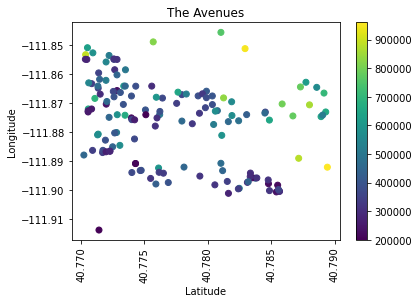

In [6]:
locationPlot = plt.scatter(x= dataSet['Latitude'], y= dataSet['Longitude'], c= dataSet['SoldPrice'], cmap='viridis')
plt.title("The Avenues")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.xticks(rotation='vertical')
plt.colorbar(locationPlot)
plt.show()

## So, from the above data we can see that as houses further to the North-East (top right hand corner of the plot), the houses increase in price.

# Task 5

In [7]:
# housingSellsTotSqfAcres = sm.ols(formula="SoldPrice ~ TotSqf + Acres", data= dataSet).fit()
# housingSellsTotSqfAcres.summary()

housingSellsListPrice = sm.ols(formula="SoldPrice ~ LstPrice", data= dataSet).fit()
housingSellsListPrice.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     9809.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          1.21e-133
Time:                        21:19:38   Log-Likelihood:                -1641.6
No. Observations:                 145   AIC:                             3287.
Df Residuals:                     143   BIC:                             3293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.67e+04   4597.244      3.633      0.000    7614.224    2.58e+04
LstPrice       0.9350      0.009     99.042      0.000       0.916       0.954
==============================================================================
Omnibus:                       80.161   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              543.026
Skew:                          -1.847   Prob(JB):                    1.21e-118
Kurtosis:                      11.732   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The R-squared value is 0.986 which means the line that we calculated explaines the data extreamly well. If it explained the data perfectly the value would be 1.

## The beta 1 for this model is 1.67 * 10^4 which is the y intercept. This value means that if a house was listed as 0 dollars, we would actulally end up paying 16700 for the house. Bait and switched!!

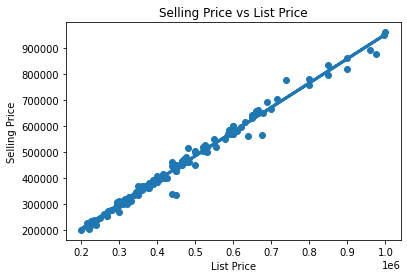

In [8]:
plt.scatter(x=dataSet['LstPrice'], y=dataSet['SoldPrice'])
plt.title("Selling Price vs List Price")
plt.xlabel('List Price')
plt.ylabel('Selling Price')
plt.plot(dataSet['LstPrice'],housingSellsListPrice.predict(), linewidth=3)
plt.show()

# Task 6

In [9]:
display(dataSet.columns)
 
housingSellsListPriceMultiLineReg = sm.ols(formula="SoldPrice ~ TotSqf + TotBth + Taxes + Longitude", data= dataSet).fit()
housingSellsListPriceMultiLineReg.summary()

Index(['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice',
       'Patio', 'PkgSpacs', 'PropType', 'PropTypeNum', 'SoldPrice', 'Taxes',
       'TotBed', 'TotBth', 'TotSqf', 'YearBlt'],
      dtype='object')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     167.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.32e-52
Time:                        21:19:38   Log-Likelihood:                -1821.8
No. Observations:                 145   AIC:                             3654.
Df Residuals:                     140   BIC:                             3669.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.048e+07   4.96e+07      1.826      0.070   -7.49e+06    1.88e+08
TotSqf        50.7219     10.550      4.808      0.000      29.864      71.580
TotBth      1.585e+04   8872.334      1.786      0.076   -1693.053    3.34e+04
Taxes         76.0901      8.622      8.825      0.000      59.044      93.137
Longitude   8.078e+05   4.43e+05      1.824      0.070   -6.78e+04    1.68e+06
==============================================================================
Omnibus:                       27.942   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.909
Skew:                           0.930   Prob(JB):                     6.51e-11
Kurtosis:                       5.075   Cond. No.                     3.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## So from the above it seems that TotSqf and Taxes are the best predictors for the selling price. 

## 1. The TotSqf coefficent is measuring the price increase in the house as the square footage of the house increases.

## 2. As the number of garages goes up it adds about 9.98 * 10^4 or 99800 dollars to the house value ('SoldPrice ~ GaragCap')

## 3. ("SoldPrice ~ Latitude + Longitude") coefficents are 12770000 for Latiude and 5681000 for Longitude, so it would appear that they both have an effect, but Latiude have more of an effect on the selling price than Longitude

## 4. So to get a correlation that would be pretty tought to get an r^2 value that is 0.986 would be really hard and if we did get that I would be suspicious that we were over fitting. The varibales that seem to work the best are TotSqf, TotBth, Taxes, and Longitude with r^2 value of 0.827 seems to be the a pretty good predictor.

# Task 7

In [10]:
housingSellPropTypeNum = sm.ols(formula="SoldPrice ~ PropTypeNum", data= dataSet).fit()
housingSellPropTypeNum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     14.26
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           0.000233
Time:                        21:19:38   Log-Likelihood:                -1942.3
No. Observations:                 145   AIC:                             3889.
Df Residuals:                     143   BIC:                             3895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.335e+05   3.14e+04     10.627      0.000    2.71e+05    3.96e+05
PropTypeNum  1.308e+05   3.46e+04      3.776      0.000    6.23e+04    1.99e+05
==============================================================================
Omnibus:                       23.459   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.029
Skew:                           1.039   Prob(JB):                     4.97e-07
Kurtosis:                       3.697   Cond. No.                         4.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
housingSellPropTypeNum = sm.ols(formula="SoldPrice ~ PropTypeNum + TotSqf", data= dataSet).fit()
housingSellPropTypeNum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     166.5
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           5.84e-38
Time:                        21:19:38   Log-Likelihood:                -1861.6
No. Observations:                 145   AIC:                             3729.
Df Residuals:                     142   BIC:                             3738.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.343e+05   2.15e+04      6.239      0.000    9.17e+04    1.77e+05
PropTypeNum -1.319e+04   2.17e+04     -0.609      0.543    -5.6e+04    2.96e+04
TotSqf        134.4496      7.896     17.028      0.000     118.841     150.058
==============================================================================
Omnibus:                       19.883   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.416
Skew:                           0.657   Prob(JB):                     3.36e-08
Kurtosis:                       4.993   Cond. No.                     8.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

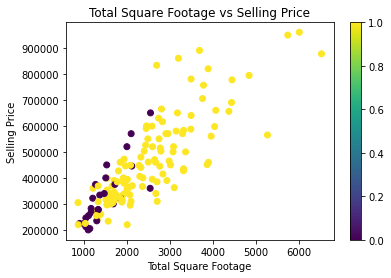

In [12]:
plt.colorbar(plt.scatter(x= dataSet['TotSqf'], y= dataSet['SoldPrice'], c= dataSet['PropTypeNum'], cmap='viridis'))
plt.title('Total Square Footage vs Selling Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Selling Price')
plt.show()

## So from the above information, I think the first red flag when only using property type number we see an r^2 value that is 0.091, which is pretty poor and indicates that it doesn't fit the data very well. However, we can also see from the plot that there are Condo/Townhouses that increase in square footage and onece that data ends for those categories, all of the larger square footage homes are Single Family homes. So the confounder is that Condos/Townhouse are usually lower in square footage than the Single Family homes which makes the data seem like property types adiquatle fits the selling price, but in reality its just the size difference that matters.